Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4618 - loss: 1.0566 - val_accuracy: 0.4062 - val_loss: 1.0484
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4079 - loss: 1.0461 - val_accuracy: 0.4688 - val_loss: 1.0224
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5473 - loss: 1.0163 - val_accuracy: 0.5938 - val_loss: 0.9930
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7695 - loss: 0.9626 - val_accuracy: 0.6875 - val_loss: 0.9604
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7243 - loss: 0.9610 - val_accuracy: 0.7188 - val_loss: 0.9256
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7666 - loss: 0.9074 - val_accuracy: 0.7188 - val_loss: 0.8859
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8088 - loss: 0.8700 - val_accuracy: 0.7188 - val_loss: 0.8439
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8404 - loss: 0.8155 - val_accuracy: 0.7188 - val_loss: 0.8000
Ep

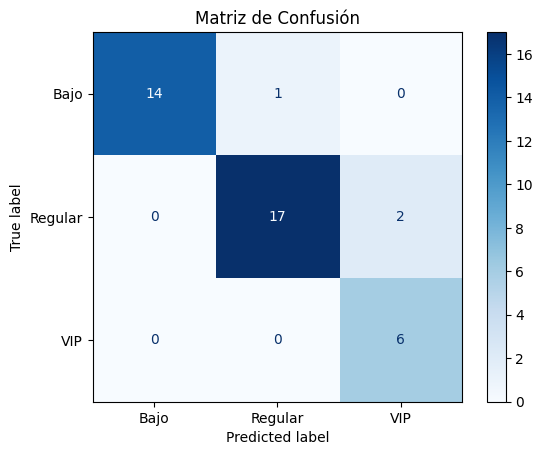

Reporte de Clasificación:
               precision    recall  f1-score   support

        Bajo       1.00      0.93      0.97        15
     Regular       0.94      0.89      0.92        19
         VIP       0.75      1.00      0.86         6

    accuracy                           0.93        40
   macro avg       0.90      0.94      0.91        40
weighted avg       0.94      0.93      0.93        40



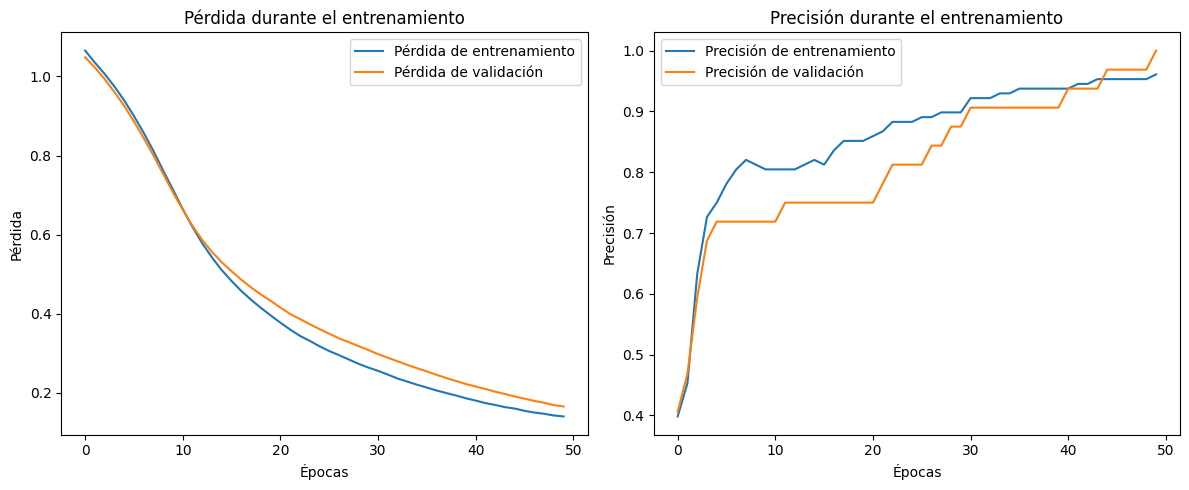

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


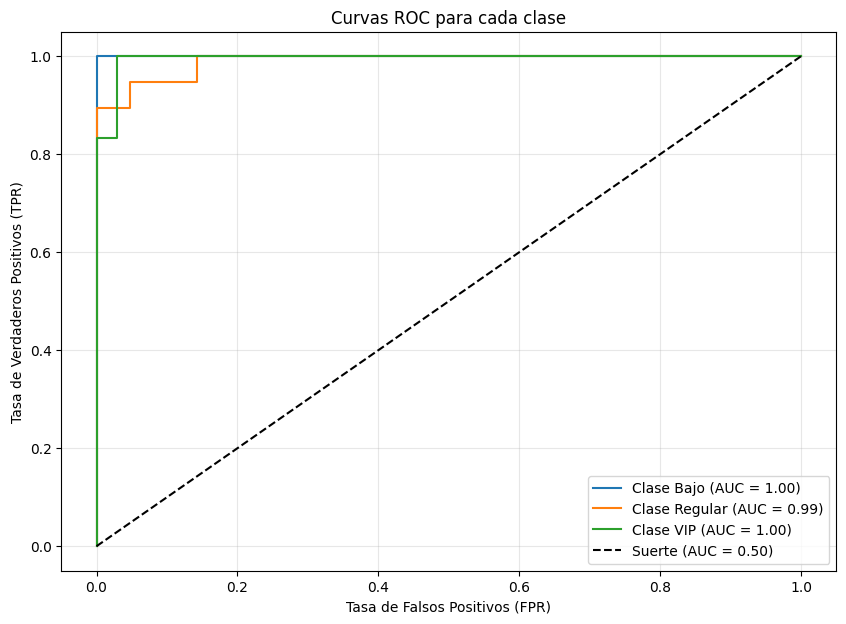

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Cargar los datos
rutadataset = 'Mall_Customers.csv'  # Ajusta la ruta si es necesario
data = pd.read_csv(rutadataset)

# Agregar la columna de clasificación según Spending Score
def clasificacion_clientes(spending_score): #Se crea una función para el llamado desde el código principal
    if spending_score >= 70:
        return 'VIP'
    elif spending_score >= 40:
        return 'Regular'
    else:
        return 'Bajo'

data['Customer_Type'] = data['Spending Score (1-100)'].apply(clasificacion_clientes)

# Codificar la variable objetivo (Customer_Type)
label_encoder = LabelEncoder()
data['Customer_Type_Code'] = label_encoder.fit_transform(data['Customer_Type'])

# Seleccionar las características y la variable objetivo
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Customer_Type_Code']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convertir las etiquetas a formato categórico para la red neuronal
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

# Crear la red neuronal
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  # Capa oculta con 16 neuronas
    Dense(8, activation='relu'),                              # Capa oculta con 8 neuronas
    Dense(3, activation='softmax')                            # Capa de salida con 3 clases
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar la red neuronal
history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=1)
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy:.4f}')

# Predecir en el conjunto de prueba
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Reporte de Clasificación:\n", report)

# Graficar la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfica de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Curvas ROC
# Binarizar las etiquetas para calcular la curva ROC de múltiples clases
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Obtener las predicciones de probabilidad para cada clase
y_pred_probs = model.predict(X_test)

# Configurar los datos para la curva ROC
fpr = {}  # False Positive Rate
tpr = {}  # True Positive Rate
roc_auc = {}  # AUC para cada clase

# Calcular FPR, TPR y AUC para cada clase
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC
plt.figure(figsize=(10, 7))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Clase {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--', label='Suerte (AUC = 0.50)')

# Configuración de la gráfica
plt.title('Curvas ROC para cada clase')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
